In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

path = '/Users/dangloan/Documents/learning_analytics/project/'

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

In [3]:
df = pd.read_csv(path + '3_data/clothing_review/Womens Clothing E-Commerce Reviews.csv')

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.columns =['Clothing_ID',
 'Age',
 'Title',
 'Review_Text',
 'Rating',
 'Recommended_IND',
 'Positive_Feedback_Count',
 'Division_Name',
 'Department_Name',
 'Class_Name']

In [6]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
a = df.groupby('Clothing_ID')['Age'].count().reset_index()
b = a.sort_values(by='Age',ascending=False)
# b['Age'] = b['Age'].astype(int)
b['Clothing_ID'] = b['Clothing_ID'].astype(str)
print(b['Age'].dtype)
print(b['Clothing_ID'].dtype)

fig, ax1 = plt.subplots(figsize=(12,6))
sns.distplot(b['Age'])
plt.xlabel('Count_ProductID')

int64
object


Text(0.5, 0, 'Count_ProductID')

In [8]:
a.describe()

,Clothing_ID,Age
count,1206.00000,1206.000000
mean,602.50000,19.474295
std,348.28652,69.009764
min,0.00000,1.000000
25%,301.25000,1.000000
50%,602.50000,2.000000
75%,903.75000,6.750000
max,1205.00000,1024.000000


In [ ]:
print(b['Age'].dtype)
print(b['Clothing_ID'].dtype)

##### A product (Clothing_ID) can receive more than one review. So, analysis per product can be an idea.

In [ ]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)

In [ ]:
profile

In [9]:
#Clean data
#First remove duplicates
df[df.duplicated(keep=False)].sort_values(by='Clothing_ID')
df.drop_duplicates(keep='first',inplace=True)
# df[df['Clothing_ID'] == 862]

In [17]:
a = df.groupby('Class_Name').agg({'Rating': ['mean','std','count'],
                                 'Positive_Feedback_Count':'sum'}).reset_index()
a.columns = ['Class_Name','Rating_mean','Rating_std','Rating_count','PFC']
a = a[~a['Class_Name'].isin(['Chemises','Casual bottoms','Trend'])]


dept_map = df[['Class_Name','Department_Name']]
dept_map.drop_duplicates(keep='first', inplace=True)
dept_map.dropna(inplace=True)

a = pd.merge(a, dept_map, how='left', on='Class_Name')
a.sort_values('Rating_mean',ascending=False)

,Class_Name,Rating_mean,Rating_std,Rating_count,PFC,Department_Name
7,Layering,4.376712,0.969468,146,192,Intimate
5,Jeans,4.360384,1.016957,1146,2018,Bottoms
9,Lounge,4.301013,1.026736,691,1604,Intimate
4,Jackets,4.295455,1.143070,704,1990,Jackets
14,Sleep,4.285088,1.131194,228,399,Intimate
3,Intimates,4.279221,1.128923,154,120,Intimate
8,Legwear,4.278788,1.161306,165,210,Intimate
11,Pants,4.265850,1.067614,1388,3327,Bottoms
2,Fine gauge,4.260237,1.071052,1099,2215,Tops
12,Shorts,4.255521,1.055880,317,531,Bottoms


In [13]:
# import plotly.express as px
# # df = px.data.gapminder()

# fig = px.scatter(a, x="Rating_mean", y="Rating_std",
#                  size="Rating_count", color="Department_Name",
#                  hover_name="Class_Name",log_x=True, size_max=80)

# fig.update_layout(
#     title='Rating Statistics by Class and Department',
#     xaxis=dict(
#         title='Average Rating',
#         gridcolor='white',
#         type='log',
#         gridwidth=2,
#     ),
#     yaxis=dict(
#         title='Rating Standard Deviation',
#         gridcolor='white',
#         gridwidth=2,
#     ),
#     paper_bgcolor='rgb(243, 243, 243)',
#     plot_bgcolor='rgb(243, 243, 243)',
# )

# import plotly as py
# py.offline.init_notebook_mode(connected=True)
# plotly.offline.plot(fig, filename='rating_stats_by_class_dept.html')

NameError: name 'plotly' is not defined

In [52]:
a = df.groupby('Class_Name').agg({'Rating': ['mean','std','count'],
                                 'Recommended_IND':['mean']}).reset_index()
a.columns = ['Class_Name','Rating_mean','Rating_std','Rating_count','Rec']
a = a[~a['Class_Name'].isin(['Chemises','Casual bottoms','Trend'])]


dept_map = df[['Class_Name','Department_Name']]
dept_map.drop_duplicates(keep='first', inplace=True)
dept_map.dropna(inplace=True)

a = pd.merge(a, dept_map, how='left', on='Class_Name')
a.sort_values('Rating_mean',ascending=False)




import plotly.express as px
# df = px.data.gapminder()

fig = px.scatter(a, x="Rec", y="Rating_mean",
                 size="Rating_count", color="Department_Name",
                 hover_name="Class_Name",log_x=True, size_max=80)

fig.update_layout(
    title='Rating Statistics by Class and Department',
    xaxis=dict(
        title='Reccomendation Indicator',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Average Rating',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

import plotly as py
py.offline.init_notebook_mode(connected=True)
py.offline.plot(fig, filename='rating_stats_by_class_dept.html')

'rating_stats_by_class_dept.html'

In [ ]:
# import plotly as py
# py.offline.init_notebook_mode(connected=True)
# py.offline.plot(fig, filename='age&rating_stats_by_class_dept.html')

In [21]:
# import plotly as py
# py.offline.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import numpy as np

# data=[go.Scatter(
#     x=[1, 2, 3, 4], y=[10, 11, 12, 13],
#     mode='markers',
#     marker_size=[40, 60, 80, 100])
# ]


# py.offline.plot(data, filename='myplot.html')

'myplot.html'

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import math

# Load data, define hover text and bubble size
# data = px.data.gapminder()
# df_2007 = data[data['year']==2007]
a = a.sort_values(['Department_Name', 'Class_Name'])

hover_text = []
bubble_size = []

for index, row in a.iterrows():
    hover_text.append(('class_name: {Class_Name}<br>'+
                      'mean: {Rating_mean}<br>'+
                      'std: {Rating_std}<br>'+
                      'count: {Rating_count}<br>'
                      ).format(Class_Name=row['Class_Name'],
                               Rating_mean=row['Rating_mean'],
                               Rating_std=row['Rating_std'],
                               Rating_count=row['Rating_count']))
                                            
    bubble_size.append(math.sqrt(row['Rating_count']))

a['text'] = hover_text
a['size'] = bubble_size
sizeref = 2.*max(a['size'])/(100**2)

# Dictionary with dataframes for each continent
dept_names = a['Department_Name'].drop_duplicates(keep='first').sort_values().tolist()
dept_data = {Department_Name:a.query("Department_Name == '%s'" %Department_Name)
                              for Department_Name in dept_names}

# Create figure
fig = go.Figure()

for dept_names, Department_Name in dept_data.items():
    fig.add_trace(go.Scatter(
        x=Department_Name['Rating_mean'], y=Department_Name['Rating_std'],
        name=dept_names, text=Department_Name['text'],
        marker_size=Department_Name['size'],
        ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))
fig.update_layout(
    title='Rating Statistics by Class and Department',
    xaxis=dict(
        title='Average Rating',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Rating Standard Deviation',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
py.offline.plot(fig, filename='myplot.html')

In [22]:
# import plotly.graph_objects as go
# fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
# # fig.show()

# py.offline.plot(data, filename='myplot.html')

'myplot.html'

### Visualize data with wordcloud

Now, I would be curious to see what customers like and don't like in the high rating (Layering, Jeans, etc.) and lower-than-average rating (Sweaters, Knits, Dressees, Blouses)

In [23]:
# Explore review review title with wordcloud
# Start with loading all necessary libraries
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

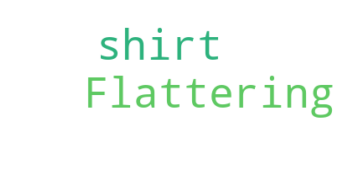

In [24]:
# # Start with one review:
# text = df.Title[4]

# # Create and generate a word cloud image:
# #wordcloud = WordCloud().generate(text)
# wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# # Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [39]:
# %% [code]
df1 = df[(df['Rating'] <= 2)]
df2 = df[(df['Rating'] == 5)]

There are 44462 words in the combination of all review.


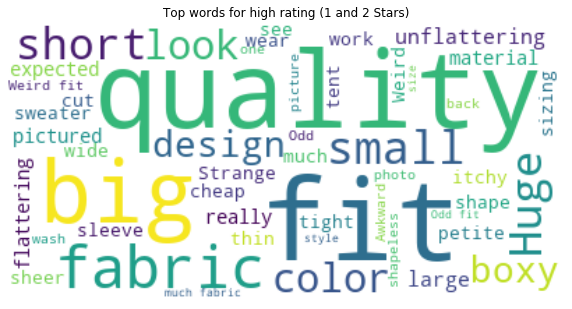

In [26]:
# %% [code]
text = " ".join(review for review in df1.Title.astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(['nan','cute','wanted','disappointed','disappointing',
                  'disappointment','beautiful','love','dress','terrible',
                  'good','top','bad','sadly','nice','great','pretty','horrible',
                  'super','poor','sad','way','jeans','run','runs','pant'])

# wordcloud = WordCloud(stopwords=stopwords,
#                       background_color="black",
#                      colormap="Dark2").generate(text) ##'Dark2'
colors = ["aquamarine","darkgoldenrod","tomato"]
wordcloud = WordCloud(stopwords=stopwords,max_font_size=80, max_words=50,
                      background_color="white").generate(text) ##'Dark2'

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words for high rating (1 and 2 Stars)')
plt.savefig(path + '/3_data/clothing_review/WdClould_negative_lessthan2.png')
plt.show()

In [ ]:
plt.savefig(path + '/3_data/clothing_review/WdClould_negative_lessthan2.png')

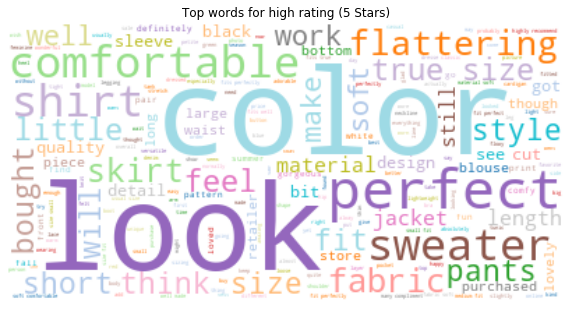

In [29]:
# %% [code]
text = " ".join(review for review in df2['Review_Text'].astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))
stopwords = set(STOPWORDS)
stopwords.update(['nan','cute','wanted','disappointed','disappointing',
                  'disappointment','beautiful','love','dress','terrible',
                  'good','top','bad','sadly','nice','great','pretty','horrible',
                  'super','poor','sad','way','jeans','run','runs','pant',
                 'really','back','even','much','ordered','wear','one','tried'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                     colormap="tab20").generate(text) ##'Dark2'

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words for high rating (5 Stars)')
# plt.savefig(path + '/3_data/clothing_review/WdClould_positive_equal5.png')
plt.show()

There are 560 words in the combination of all review.


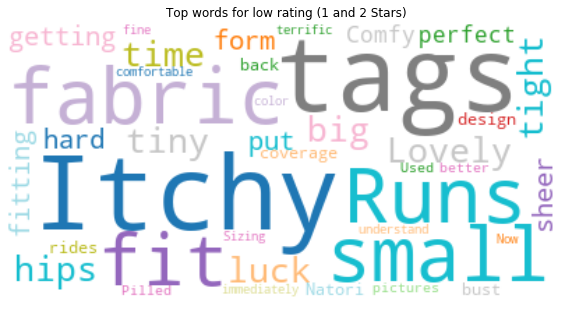

In [51]:
# %% [code]
df3 = df[(df['Rating'] <= 3) & (df['Class_Name'] == 'Intimates')]
text = " ".join(review for review in df3['Title'].astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))
stopwords = set(STOPWORDS)
stopwords.update(['nan','cute','wanted','disappointed','disappointing',
                  'disappointment','beautiful','love','dress','terrible',
                  'good','top','bad','nice','great','pretty','horrible',
                  'super','poor','sad','way','really','sweater','much',
                 'upon','attractive','ideal','pant','pants'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                     colormap="tab20").generate(text) ##'Dark2'

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words for low rating (1 and 2 Stars)')
plt.show()

# TOPIC MODELING

##### I'm trying to see what people talk about in each product, i.e. if they like or dislike(rating average), then what they like/dislike about that product. I use topic modeling using LDA model. An expected result of the model would be that, for clothing id 1001, positive reviews talk most about quality, while negative reviews talk most about price, etc.

In [ ]:
### For products with low ratings (rating <=2)

In [ ]:
df_neg = df[df['Rating'] <=2]

In [ ]:
df_neg['Review_Text'] = df_neg['Review_Text'].astype(str)

In [ ]:
# df2 = df_neg.groupby('Clothing_ID')['Review_Text'].apply(lambda x: x.sum()).reset_index()

In [ ]:
df2 = df_neg[['Clothing_ID', 'Review_Text']]

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')

In [ ]:
from langdetect import detect

from tqdm import tqdm
tqdm.pandas()

df2['lang'] = df2['Review_Text'].apply(detect)
df2 = df2.loc[df2.lang=='en']

In [ ]:
df2 = df2.loc[df2.lang=='en']

In [ ]:
len(df2)

In [ ]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
my_words = ['nan','way','back','x','bit','JJS','DT','CD','VBZ','MD',
            'disappointed','usually','still','bottom','however','item',
            'reason','much','great','definitely','lb','DT','work',
            'x','feel','pair','super','fall','piece','cd',
            'seem','md','coat','beautiful','thought','felt',
            'sad','ordered','someone','perfect',
            'make','wear','love','get','go','order','try','want',
            'run','think','see','review','buy','good',
            'take','come','give','keep','put','need','say','online',
            'bad','nice','cool','dt','rbr','person','purchase',
            'jacket','pants','shirt','dress','sweater','top','skirt','jean','blouse','denim',
           'look','like','really','would']
stop_words = stop_words.union(my_words)

In [ ]:
# Clean Review_Text

def clean(text):
    #Remove punctuations
    t = re.sub('[^a-zA-Z]',' ',text)
    #Convert to lowercase
    t = t.lower()
    #Remove tags
    t=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",t)
    #Remove special characters and digits
    t=re.sub("(\\d|\\W)+"," ",t)
    #Convert to list from string
    t = t.split()
#     #Remove stopwords
#     t = [word for word in t if not word in stop_words]
    
    #Lemmatisation
    lem = WordNetLemmatizer()
    t = [lem.lemmatize(word) for word in t if not word in stop_words]
    
    
    t = " ".join(t)
    return t

df2['Review_Text_cleaned'] = df2['Review_Text'].apply(lambda x: clean(x))

# df2['Review_Text_cleaned1'] =df2['Review_Text_cleaned'].apply(
#     lambda l: [item for sublist in l for item in sublist])
df2['Review_Text_cleaned'].dropna(inplace=True)

In [ ]:
df2.columns.tolist()

In [ ]:
#Tokenize
from nltk.tokenize import sent_tokenize
df2['Review_Text_sentences'] = df2['Review_Text_cleaned'].apply(sent_tokenize)

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def token_text(text):
    return [w_tokenizer.tokenize(w) for w in text]
df2['Review_Text_tokenized'] = df2['Review_Text_sentences'].apply(token_text)

In [ ]:
#POS tagging
from nltk import pos_tag

# def pos_tag(text):
#     return [pos_tag(w) for w in text]
# df2['Review_Text_postag'] = df2['Review_Text_sentences'].apply(pos_tag) ## This function results in an 
#                                                                            ## error "Maximum recursion"

df2['Review_Text_postag'] = df2['Review_Text_tokenized'].apply(lambda sentence:
                        [pos_tag(token) for token in sentence])

In [ ]:
# convert Penn treebank tag to wordnet tag
from nltk.corpus import wordnet
def penn_to_wn_tags(pos_tag):
    if pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('J'):
        return wordnet.ADJ
#     elif pos_tag.startswith('R'):
#         return wordnet.ADV
    else:
        return None

# lemmatize text based on POS tags
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatize_text(text):
#     pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [[wnl.lemmatize(el[0], penn_to_wn_tags(el[1]))
                         if penn_to_wn_tags(el[1]) else el[1]
                         for el in pos_tagged_text]
                         for pos_tagged_text in text]
    
    return lemmatized_tokens

In [ ]:
df2['Review_Text_lemmatized'] = df2['Review_Text_postag'].apply(lemmatize_text)

In [ ]:
from itertools import chain 
df2['tokens'] = df2['Review_Text_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
df2['tokens'] = df2['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in stop_words and len(token)>1])

### Count number of words in a sentence
to see if applying LDA is ok (LDA doesn't perform well if sentence is less than 20 words

In [ ]:
df2['count_word'] = df2['Review_Text_cleaned'].apply(lambda x: len(x.split()))

In [ ]:
df2['count_word'].describe()

The average number of words in a clean text (in a row) is 22 (>20), which is fine for applying LDA. One possible way to increase number of word in a text is to merge reviews of the same product into one cell (negative to negative, positive to positve, not mixing negative with positive reviews).

### Top frequent word

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words,
                   max_features=10000, ngram_range=(1,3))

corpus = df2['Review_Text_cleaned'].tolist()
X=cv.fit_transform(corpus)

In [ ]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
    vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
    reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [ ]:

#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [ ]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
    reverse=True)
    return words_freq[:n]


top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [ ]:
##Get some information of the clothing item from df dataset
cat = df_neg[df_neg['Class_Name'] == 'Jeans']
df_cat = df2[df2['Clothing_ID'].isin(cat['Clothing_ID'])]

### Building LDA model

In [ ]:
import itertools
from gensim import corpora, models

# list_of_list_of_tokens = [["a","b","c"], ["d","e","f"]]
# ["a","b","c"] are the tokens of document 1, ["d","e","f"] are the tokens of document 2...

# df_pos['tokens'] = df_pos['Review_Text_lemmatized'].apply(
#     lambda x : list(itertools.chain.from_iterable(x)))

list_of_list_of_tokens = df2['tokens'].tolist()
dictionary_LDA = corpora.Dictionary(list_of_list_of_tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

num_topics = 10
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

In [ ]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=40):
    print(str(i)+": "+ topic)
    print()

In [ ]:
lda_model[corpus[2]]

In [ ]:
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

##### Find interesting topics in negative rating reviews (number of topics = 10):
##### Topic 10: Price vs quality, delivery time, smell
##### Topic 4: Size (top kw: size, small, medium, large, fit)
##### Topic 8: Material (top kw: fabric, ichty, thick, hot, seam)
##### Topic 2: Color
##### Topic 5: Problem related to washing (top kw:wash, dry, hand, shrunk, cold, water, clean, instruction)
##### Topic 1: Look in general
##### Topic 7: Style/look
##### Topic 3: Size and material (thin, sheer)???
##### Topic 6: Design (boxy, arm, fit, retailer, hole,seam)???
##### Topic 9: Bad tailored details, size???

In [ ]:
# Save model to disk.
temp_file = datapath("model")
model.save('lda.lda_model')
# Load a potentially pretrained model from disk.
lda_model =  models.LdaModel.load('lda.lda_model')

In [ ]:
topics = [lda_model[corpus[i]] for i in range(len(df2))]

In [ ]:
topics

In [ ]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

In [ ]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [ ]:
document_topic.head()

In [ ]:
dominant_topic = np.argmax(document_topic.values, axis=1)
document_topic['dominant_topic'] = dominant_topic

# # Styling
# def color_green(val):
#     color = 'green' if val > .1 else 'black'
#     return 'color: {col}'.format(col=color)

# def make_bold(val):
#     weight = 700 if val > .1 else 400
#     return 'font-weight: {weight}'.format(weight=weight)

# # Apply Style
# document_topic = document_topic.head(15).style.applymap(color_green).applymap(make_bold)
document_topic

In [ ]:
x=list(range(0,10,1))
lda_output = pd.concat([df2[['Clothing_ID','Review_Text']],
                       document_topic[['dominant_topic'] + x]],ignore_index=True, axis=1)

In [ ]:
y.head()

In [ ]:
x1 =df2[['Clothing_ID','Review_Text']].reset_index()
x2=document_topic[['dominant_topic'] + x]
y = pd.concat([x1,x2], axis=1)

In [ ]:
##### Find interesting topics in negative rating reviews (number of topics = 10):
##### Topic 10: Price vs quality, delivery time, smell
##### Topic 4: Size (top kw: size, small, medium, large, fit)
##### Topic 8: Material (top kw: fabric, ichty, thick, hot, seam)
##### Topic 2: Color
##### Topic 5: Problem related to washing (top kw:wash, dry, hand, shrunk, cold, water, clean, instruction)
##### Topic 1: Look in general
##### Topic 7: Style/look
##### Topic 3: Size and material (thin, sheer)???
##### Topic 6: Design (boxy, arm, fit, retailer, hole,seam)???
##### Topic 9: Bad tailored details, size???

### Map to data
##### Topic 9: Price vs quality, delivery time, smell
##### Topic 3: Size (top kw: size, small, medium, large, fit)
##### Topic 7: Material (top kw: fabric, ichty, thick, hot, seam)
##### Topic 1: Color
##### Topic 4: Problem related to washing (top kw:wash, dry, hand, shrunk, cold, water, clean, instruction)
##### Topic 0: Look in general
##### Topic 6: Style/look
##### Topic 2: Size and material (thin, sheer)???
##### Topic 5: Design (boxy, arm, fit, retailer, hole,seam)???
##### Topic 8: Size, bad tailored details, ???

In [ ]:
y[y[1] >=0.9].sample(1)

##### After going through some sample and verify model result reliability by eyes, it makes sense most of the case. 1 out of 5 case has inappropriate topic allocation.

##### The topic interpretation I generated seeems to work quite well

##### I find out that if the second dominant topic is around 0.3, it is worth select it is top topic as well. With that, we can say a review can mention more than 1 major issue of the product.

In [ ]:
## Let's find out how many documents is allocated to each topic

In [ ]:
document_topic1 = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

sns.set(rc={'figure.figsize':(10,5)})
document_topic1.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

In [ ]:
##### Find interesting topics in negative rating reviews (number of topics = 10):
##### Topic 10: Price vs quality, delivery time, smell
##### Topic 4: Size (top kw: size, small, medium, large, fit)
##### Topic 8: Material (top kw: fabric, ichty, thick, hot, seam)
##### Topic 2: Color
##### Topic 5: Problem related to washing (top kw:wash, dry, hand, shrunk, cold, water, clean, instruction)
##### Topic 1: Look in general
##### Topic 7: Style/look
##### Topic 3: Size and material (thin, sheer)???
##### Topic 6: Design (boxy, arm, fit, retailer, hole,seam)???
##### Topic 9: Bad tailored details, size???

#### Next, we can pick documents (reviews) that have very high probability (>=0.85) allocated to a topic. Do it for 10 topics